In [0]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_X, train_y), (test_X, test_y) = imdb.load_data(num_words=1200)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
train_X[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
TKObject = Tokenizer(num_words=1200)

In [0]:
X_train = TKObject.sequences_to_matrix(train_X)

In [0]:
X_test = TKObject.sequences_to_matrix(test_X)

In [0]:
y_train = train_y.astype('float')
y_test = test_y.astype('float')

In [0]:
from tensorflow.keras.models import Sequential
Model = Sequential()

In [0]:
from tensorflow.keras.layers import Dense

Model.add(Dense(16, activation = 'relu', input_dim = 1200))

In [0]:
Model.add(Dense(8, activation = 'relu'))

In [0]:
Model.add(Dense(1, activation = 'sigmoid'))

In [14]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                19216     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 19,361
Trainable params: 19,361
Non-trainable params: 0
_________________________________________________________________


In [0]:
Model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [0]:
Model_history = Model.fit(X_train, y_train, epochs = 10, batch_size=16, validation_split=0.2, verbose = 0)

In [17]:
Model_history.history

{'accuracy': [0.8317999839782715,
  0.8690000176429749,
  0.8748000264167786,
  0.8802000284194946,
  0.8834499716758728,
  0.8898000121116638,
  0.8938999772071838,
  0.8997499942779541,
  0.9047999978065491,
  0.9102500081062317,
  0.9151999950408936,
  0.9200500249862671,
  0.9253000020980835,
  0.9308500289916992,
  0.9345499873161316,
  0.9378499984741211,
  0.9416999816894531,
  0.9457499980926514,
  0.9485999941825867,
  0.9508000016212463,
  0.9524000287055969,
  0.95455002784729,
  0.9553999900817871,
  0.9573000073432922,
  0.9581500291824341,
  0.9595000147819519,
  0.9606000185012817,
  0.9615499973297119,
  0.9627500176429749,
  0.9636499881744385,
  0.9641000032424927,
  0.9654499888420105,
  0.9664499759674072,
  0.9679499864578247,
  0.9685500264167786,
  0.9691500067710876,
  0.9704499840736389,
  0.9721999764442444,
  0.9721500277519226,
  0.972000002861023,
  0.9734500050544739,
  0.9739500284194946,
  0.9750499725341797,
  0.9763000011444092,
  0.9764500260353088,
 

In [0]:
History_dic = Model_history.history

In [32]:
History_dic['loss'][0:5]

[0.010992583818733692,
 0.01111256331205368,
 0.011693273670971394,
 0.014410000294446945,
 0.023215293884277344]

In [33]:
History_dic['accuracy'][0:5]

[0.9979000091552734,
 0.9977999925613403,
 0.9980499744415283,
 0.9981499910354614,
 0.9974499940872192]

In [34]:
History_dic['val_loss'][0:5]

[35.0473518371582,
 35.553279876708984,
 35.14025115966797,
 35.31148147583008,
 35.48958969116211]

In [35]:
History_dic['val_accuracy'][0:5]

[0.7936000227928162,
 0.79339998960495,
 0.7886000275611877,
 0.7924000024795532,
 0.7893999814987183]

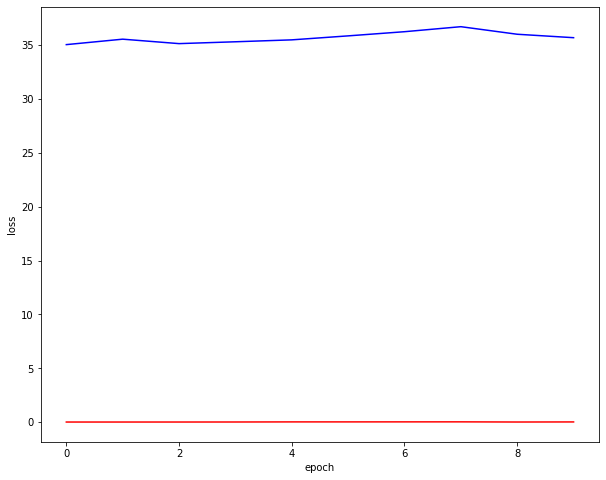

In [37]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(10)

plt.figure(figsize = (10,8))

plt.plot(epoch, History_dic['loss'], c = 'red', label = 'loss')
plt.plot(epoch, History_dic['val_loss'], c = 'blue', label = 'val_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
epoch.shape

()

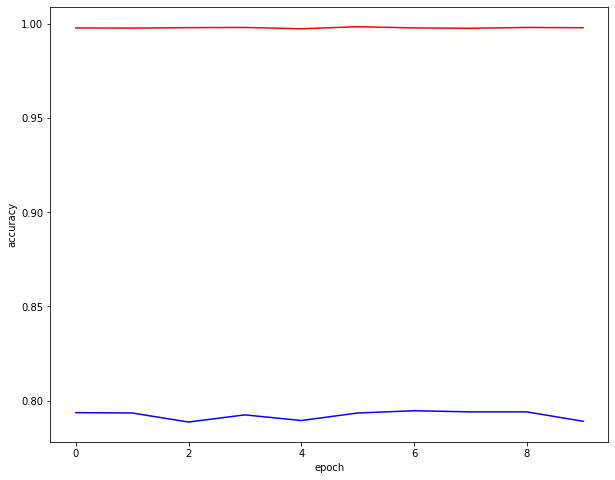

In [38]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(10)

plt.figure(figsize = (10,8))

plt.plot(epoch, History_dic['accuracy'], c = 'red', label = 'loss')
plt.plot(epoch, History_dic['val_accuracy'], c = 'blue', label = 'val_loss')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [39]:
test_loss, test_accuracy = Model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 32.1396 - accuracy: 0.7921


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Batch_size = [16, 32, 64, 128, 256, 512]

Test_loss = []
Test_acc = []

for batchsize in Batch_size:
  Model = Sequential()
  Model.add(Dense(16, activation = 'relu', input_dim = 1200))
  Model.add(Dense(8, activation = 'relu'))
  Model.add(Dense(1, activation = 'sigmoid'))
  Model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
  Model.fit(X_train, y_train, epochs = 10, batch_size=batchsize, validation_split=0.2, verbose = 0)
  test_loss, test_accuracy = Model.evaluate(X_test, y_test)
  Test_loss.append(test_loss)
  Test_acc.append(test_accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.3267 - accuracy: 0.8622


Text(0, 0.5, 'loss')

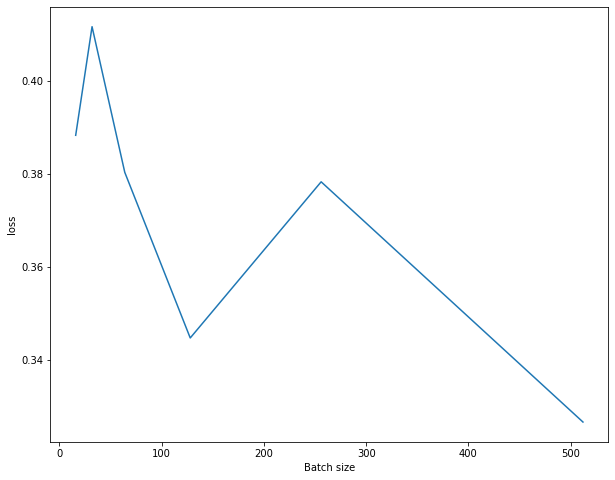

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(Batch_size,Test_loss)
plt.xlabel('Batch size')
plt.ylabel('loss')


Text(0, 0.5, 'accuracy')

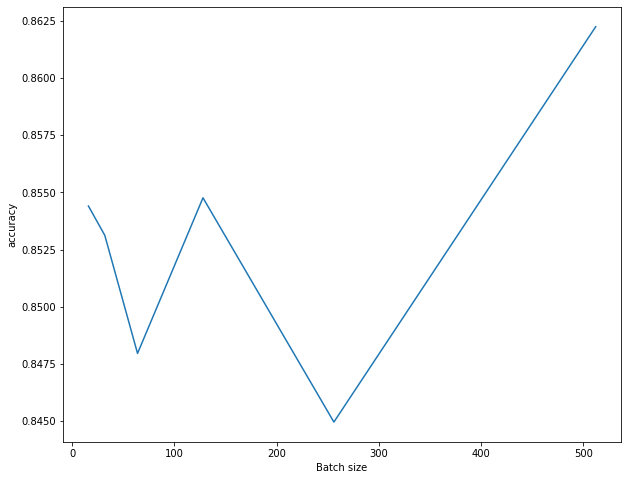

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(Batch_size,Test_acc)
plt.xlabel('Batch size')
plt.ylabel('accuracy')

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Optimizers = ['rmsprop', 'sgd', 'adam', 'adagrad', 'adamax']

Test_loss = []
Test_acc = []

for op in Optimizers:
  Model = Sequential()
  Model.add(Dense(16, activation = 'relu', input_dim = 1200))
  Model.add(Dense(8, activation = 'relu'))
  Model.add(Dense(1, activation = 'sigmoid'))
  Model.compile(loss = 'binary_crossentropy', optimizer = op, metrics = ['accuracy'])
  Model.fit(X_train, y_train, epochs = 10, batch_size=128, validation_split=0.2, verbose = 0)
  test_loss, test_accuracy = Model.evaluate(X_test, y_test)
  Test_loss.append(test_loss)
  Test_acc.append(test_accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.3257 - accuracy: 0.8635


Text(0, 0.5, 'loss')

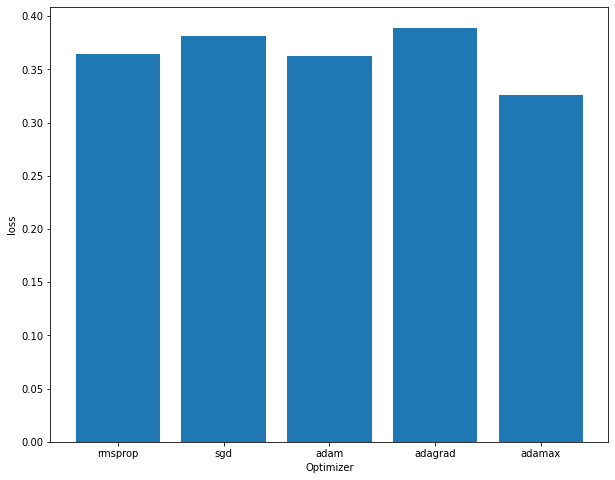

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.bar(Optimizers,Test_loss)
plt.xlabel('Optimizer')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

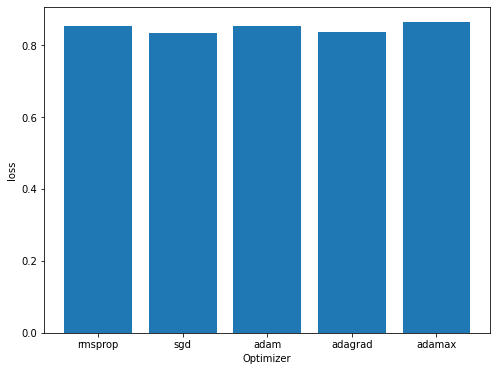

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(Optimizers,Test_acc)
plt.xlabel('Optimizer')
plt.ylabel('loss')

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Acti = ['relu', 'elu', 'softmax', 'softplus', 'tanh']

Test_loss = []
Test_acc = []

for acti in Acti:
  Model = Sequential()
  Model.add(Dense(16, activation = acti, input_dim = 1200))
  Model.add(Dense(8, activation = acti))
  Model.add(Dense(1, activation = 'sigmoid'))
  Model.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])
  Model.fit(X_train, y_train, epochs = 10, batch_size=128, validation_split=0.2, verbose = 0)
  test_loss, test_accuracy = Model.evaluate(X_test, y_test)
  Test_loss.append(test_loss)
  Test_acc.append(test_accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.3263 - accuracy: 0.8606


Text(0, 0.5, 'loss')

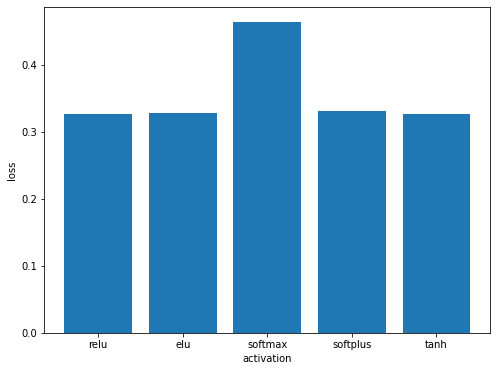

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(Acti,Test_loss)
plt.xlabel('activation')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

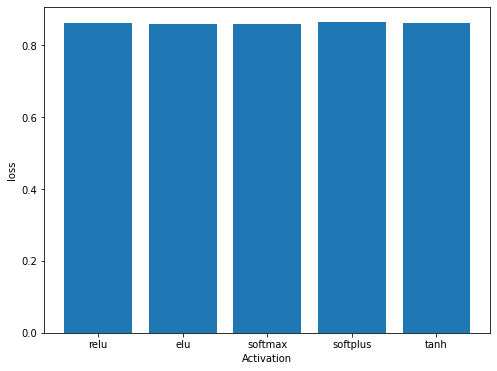

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(Acti,Test_acc)
plt.xlabel('Activation')
plt.ylabel('loss')

In [53]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [63]:
os.listdir('./gdrive/My Drive/Colab Notebooks')

['Untitled0.ipynb',
 'Example_200Bird.ipynb',
 'Untitled1.ipynb',
 'Copy of Untitled2 (1).ipynb',
 'Copy of Untitled2.ipynb',
 'Untitled2.ipynb',
 'Admission_Predict.csv']

In [0]:
import pandas as pd

In [0]:
Admission_Predict = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Admission_Predict.csv')

In [67]:
Admission_Predict.head

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
495         496        332          108  ...  9.02         1              0.87
496         497        337          117  ...  9.87         1              0.96
497         498        330          120  ...  9.56         1              0.93
498         499        312          103  ...  8.43         0              0.73
499         500        327          113  ...  9.04         0              0.84

[500 rows x 9 columns

In [68]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [0]:
import pandas as pd
Admission_Predict = pd.read_csv('Admission_Predict.csv')

In [71]:
Admission_Predict

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [72]:
Admission_Predict.values

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [498.  , 330.  , 120.  , ...,   9.56,   1.  ,   0.93],
       [499.  , 312.  , 103.  , ...,   8.43,   0.  ,   0.73],
       [500.  , 327.  , 113.  , ...,   9.04,   0.  ,   0.84]])

In [0]:
X_data = Admission_Predict.values[:,1:8]
y_data = Admission_Predict.values[:,8]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0)

In [75]:
X_train.shape, X_test.shape

((375, 7), (125, 7))

In [0]:
mean_train = X_train.mean(axis = 0)
mean_test = X_test.mean(axis = 0)

In [0]:
std_train = X_train.std(axis = 0)
std_test = X_test.std(axis = 0)

In [0]:
X_train = (X_train - mean_train)/std_train
X_test = (X_test - mean_test)/std_test

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model = Sequential()
Model.add(Dense(8, activation = 'relu', input_dim = 7))
Model.add(Dense(4, activation = 'relu'))
Model.add(Dense(1, activation = 'linear'))

Model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

In [80]:
Model.fit(X_train, y_train, epochs = 20, batch_size=16, verbose = 0)

In [81]:
test_mse, test_mae = Model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0839


In [0]:
Initial_weight = Model.get_weights()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model01 = Sequential()
Model01.add(Dense(8, activation = 'relu', input_dim = 7))
Model01.add(Dense(4, activation = 'relu'))
Model01.add(Dense(1, activation = 'linear'))

Model01.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

each_size = int(len(X_train)/5)

History_MAE = []
History_Val_MAE = []

for i in np.arange(5):
  Start = i*each_size
  End = each_size*(i+1)
  val_X = X_train[Start:End]
  val_y = y_train[Start:End]
  X_train_New = np.concatenate((X_train[:Start],X_train[End:]), axis = 0)
  y_train_New = np.concatenate((y_train[:Start], y_train[End:]), axis = 0)
  Model01.set_weights(Initial_weight)
  Model_History = Model01.fit(X_train_New, y_train_New, validation_data=(val_X, val_y), epochs = 200, batch_size=4, verbose =0)
  Current_Validation_MAE_history = Model_History.history['val_mae']
  Current_MAE_history = Model_History.history['mae']
  Best_Val_MAE_Index = np.argmin(Current_Validation_MAE_history)
  Best_Val_MAE = Current_Validation_MAE_history[Best_Val_MAE_Index]
  History_MAE.append(Current_MAE_history)
  History_Val_MAE.append(Current_Validation_MAE_history)

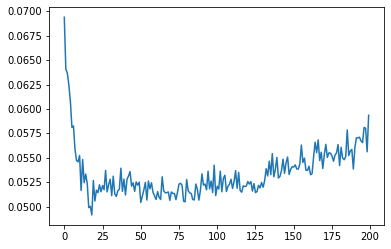

In [99]:
import matplotlib.pyplot as plt
import numpy as np

Epochs = np.arange(200)
plt.plot(Epochs,History_Val_MAE[4])


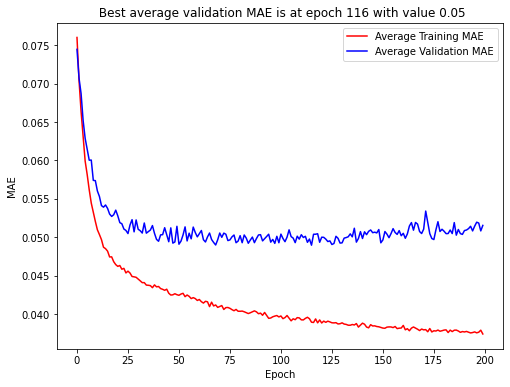

In [101]:
import matplotlib.pyplot as plt
import numpy as np

Epochs = np.arange(200)

History_MAE_Ave = np.mean(History_MAE, axis = 0 )
History_Val_MAE_Ave = np.mean(History_Val_MAE, axis = 0)

Best_Val_MAE_Index = np.argmin(History_Val_MAE_Ave)
Best_Val_MAE = History_Val_MAE_Ave[Best_Val_MAE_Index]

plt.figure(figsize=(8,6))
plt.plot(Epochs, History_MAE_Ave, c = 'red', label = 'Average Training MAE')
plt.plot(Epochs, History_Val_MAE_Ave, c = 'blue', label = 'Average Validation MAE')
title_string = f' Best average validation MAE is at epoch {Best_Val_MAE_Index+1} with value {Best_Val_MAE:.2f}'

plt.title(title_string)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [0]:
Model01.set_weights(Initial_weight)
Model_History = Model01.fit(X_train_New, y_train_New, epochs = 116, batch_size=4, verbose =0)

In [103]:
Model01.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0050 - mae: 0.0559


[0.005016224458813667, 0.05587974563241005]